In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

#Ensemble Methods
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, roc_curve, auc, confusion_matrix, recall_score, precision_score


/Users/RPantano89/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
data = pd.read_csv('Data/heart.csv') 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
models_data = dict()
def analyze_model(model, name):
    y_preds = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba[:,1])
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    accuracy = accuracy_score(y_test, y_preds)
    
    f1 = f1_score(y_test, y_preds)
    
    recall = recall_score(y_test, y_preds)
    
    precision = precision_score(y_test, y_preds)
    
    print("Accuracy {}".format(accuracy))
    print("F1 Score {}".format(f1))
    print("AUC Score {}".format(roc_auc))
    print("Recall {}".format(recall))
    print("Precision {}".format(precision))
    
    models_data[name] = [roc_auc, accuracy, f1, recall, precision] 
    

def plot_auc(classifier, title):
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    return plt.plot(fpr,tpr,label= str(title) + ", auc="+str(auc)) 


In [4]:
###Model some stuff, feature selection with decision trees

In [5]:
target = data['target']
analysis = data
analysis.drop('target', axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    analysis, target, test_size=0.33, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [8]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['sqrt', 'log2']

criterion = ['gini', 'entropy']

max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]

min_samples_split = [10,50,100]

min_samples_leaf = [1,10,20,50,100]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }


In [9]:
pprint(random_grid)

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 10, 20, 50, 100],
 'min_samples_split': [10, 50, 100],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [10]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 200 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=3, random_state=42, n_jobs = -1)
# Fit the random search model

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] min_samples_leaf=100, n_estimators=600, min_samples_split=50, criterion=gini, max_features=log2, max_depth=60 
[CV] min_samples_leaf=100, n_estimators=600, min_samples_split=50, criterion=gini, max_features=log2, max_depth=60 
[CV] min_samples_leaf=100, n_estimators=600, min_samples_split=50, criterion=gini, max_features=log2, max_depth=60 
[CV] min_samples_leaf=1, n_estimators=1600, min_samples_split=50, criterion=entropy, max_features=sqrt, max_depth=40 
[CV]  min_samples_leaf=100, n_estimators=600, min_samples_split=50, criterion=gini, max_features=log2, max_depth=60, score=0.529412, total=   4.2s
[CV] min_samples_leaf=1, n_estimators=1600, min_samples_split=50, criterion=entropy, max_features=sqrt, max_depth=40 
[CV]  min_samples_leaf=100, n_estimators=600, min_samples_split=50, criterion=gini, max_features=log2, max_depth=60, score=0.529412, total=   4.4s
[CV] min_samples_leaf=1, n_estimators=1600, min_samples_spl

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min


[CV]  min_samples_leaf=1, n_estimators=1600, min_samples_split=10, criterion=gini, max_features=log2, max_depth=60, score=0.823529, total=  13.2s
[CV] min_samples_leaf=1, n_estimators=800, min_samples_split=100, criterion=gini, max_features=sqrt, max_depth=20 
[CV]  min_samples_leaf=1, n_estimators=1600, min_samples_split=10, criterion=gini, max_features=log2, max_depth=60, score=0.794118, total=  13.0s
[CV] min_samples_leaf=1, n_estimators=800, min_samples_split=100, criterion=gini, max_features=sqrt, max_depth=20 
[CV]  min_samples_leaf=1, n_estimators=1600, min_samples_split=10, criterion=gini, max_features=log2, max_depth=60, score=0.835821, total=  12.9s
[CV] min_samples_leaf=10, n_estimators=600, min_samples_split=100, criterion=entropy, max_features=log2, max_depth=80 
[CV]  min_samples_leaf=1, n_estimators=800, min_samples_split=100, criterion=gini, max_features=sqrt, max_depth=20, score=0.529412, total=   6.5s
[CV] min_samples_leaf=10, n_estimators=600, min_samples_split=100, 

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.9min


[CV]  min_samples_leaf=1, n_estimators=1800, min_samples_split=10, criterion=gini, max_features=log2, max_depth=100, score=0.823529, total=  14.2s
[CV] min_samples_leaf=50, n_estimators=1400, min_samples_split=10, criterion=gini, max_features=sqrt, max_depth=40 
[CV]  min_samples_leaf=1, n_estimators=1800, min_samples_split=10, criterion=gini, max_features=log2, max_depth=100, score=0.794118, total=  14.6s
[CV] min_samples_leaf=50, n_estimators=1400, min_samples_split=10, criterion=gini, max_features=sqrt, max_depth=40 
[CV]  min_samples_leaf=50, n_estimators=1400, min_samples_split=10, criterion=gini, max_features=sqrt, max_depth=40, score=0.529412, total=  11.1s
[CV] min_samples_leaf=20, n_estimators=1800, min_samples_split=50, criterion=gini, max_features=log2, max_depth=10 
[CV]  min_samples_leaf=1, n_estimators=1800, min_samples_split=10, criterion=gini, max_features=log2, max_depth=100, score=0.820896, total=  14.1s
[CV] min_samples_leaf=20, n_estimators=1800, min_samples_split=5

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.1min


[CV]  min_samples_leaf=50, n_estimators=200, min_samples_split=100, criterion=gini, max_features=sqrt, max_depth=30, score=0.529412, total=   1.6s
[CV] min_samples_leaf=50, n_estimators=200, min_samples_split=100, criterion=gini, max_features=sqrt, max_depth=30 
[CV]  min_samples_leaf=50, n_estimators=200, min_samples_split=100, criterion=gini, max_features=sqrt, max_depth=30, score=0.522388, total=   1.7s
[CV] min_samples_leaf=10, n_estimators=800, min_samples_split=100, criterion=entropy, max_features=log2, max_depth=40 
[CV]  min_samples_leaf=10, n_estimators=800, min_samples_split=100, criterion=entropy, max_features=log2, max_depth=40, score=0.529412, total=   6.3s
[CV] min_samples_leaf=10, n_estimators=800, min_samples_split=100, criterion=entropy, max_features=log2, max_depth=40 
[CV]  min_samples_leaf=1, n_estimators=1800, min_samples_split=10, criterion=gini, max_features=sqrt, max_depth=20, score=0.794118, total=  14.5s
[CV] min_samples_leaf=10, n_estimators=800, min_samples_

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'min_samples_leaf': [1, 10, 20, 50, 100], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=3)

In [11]:
rf_random.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'n_estimators': 1600}

Log Loss: 
5.52627618695
Accuracy 0.84
F1 Score 0.859649122807
AUC Score 0.908456486043
Recall 0.844827586207
Precision 0.875


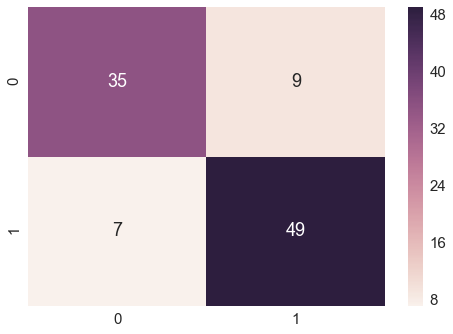

In [12]:
rf_hyper = RandomForestClassifier(bootstrap = True, n_estimators=1600, criterion = 'gini', max_depth = 10, max_features = 'log2',
                                  min_samples_leaf = 1, min_samples_split = 50, random_state=42)

rf_hyper.fit(X_train, y_train)

rf_pred = rf_hyper.predict(X_test)

print ("Log Loss: ")
print log_loss(rf_pred, y_test)

analyze_model(rf_hyper, 'Random Forest')

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm_rf = confusion_matrix(rf_pred, y_test)
sns.heatmap(cm_rf, annot=True, fmt='g')
plt.show()


In [13]:
imp = rf_hyper.feature_importances_
name = data.columns
feat_imp =  zip(name, imp)
feat_imp
#CP, CA, thalach,thal are best indicators of heart disease 

[('age', 0.031448287632045914),
 ('sex', 0.031648044060352161),
 ('cp', 0.17908743819832129),
 ('trestbps', 0.013544580788494012),
 ('chol', 0.010203084195273967),
 ('fbs', 0.00055876995320384721),
 ('restecg', 0.0036865109201380448),
 ('thalach', 0.094328217913670964),
 ('exang', 0.10862508338658423),
 ('oldpeak', 0.09979460368461901),
 ('slope', 0.055642969203448543),
 ('ca', 0.21654314609983771),
 ('thal', 0.1548892639640104)]

In [14]:
#Ensemble Classification 

Log Loss: 
5.87168793883
Accuracy 0.83
F1 Score 0.844036697248
AUC Score 0.85632183908
Recall 0.793103448276
Precision 0.901960784314


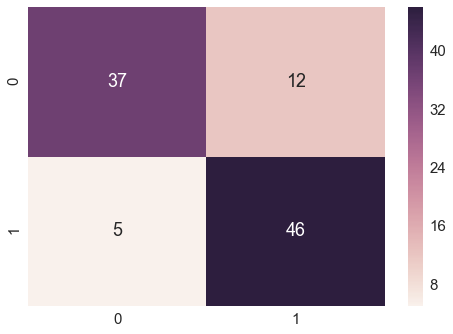

In [15]:
#Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

NB_clf_pred = NB_clf.predict(X_test)

print ("Log Loss: ")
print log_loss(NB_clf_pred, y_test)

analyze_model(NB_clf, "Naive Bayes")

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm_clf = confusion_matrix(NB_clf_pred, y_test)
sns.heatmap(cm_clf, annot=True, fmt='g')
plt.show()


Log Loss: 
14.1609063179
Accuracy 0.59
F1 Score 0.735483870968
AUC Score 0.423645320197
Recall 0.98275862069
Precision 0.587628865979


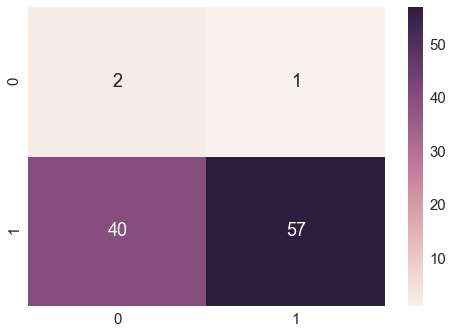

In [16]:
#SVM

from sklearn.svm import SVC
SVM_clf = SVC(C=100, probability=True)
SVM_clf.fit(X_train, y_train) 

SVM_pred = SVM_clf.predict(X_test)

print ("Log Loss: ")
print log_loss(SVM_pred, y_test)

analyze_model(SVM_clf, "SVM")

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm_SVM = confusion_matrix(SVM_pred, y_test)
sns.heatmap(cm_SVM, annot=True, fmt='g')
plt.show()

Log Loss: 
14.506549953
Accuracy 0.58
F1 Score 0.54347826087
AUC Score 0.649014778325
Recall 0.431034482759
Precision 0.735294117647


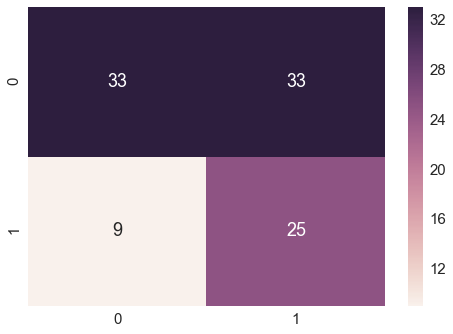

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=2)
KNN_clf.fit(X_train, y_train) 

KNN_pred = KNN_clf.predict(X_test)

print ("Log Loss: ")
print log_loss(KNN_pred, y_test)

analyze_model(KNN_clf, "KNN")

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm_KNN = confusion_matrix(KNN_pred, y_test)
sns.heatmap(cm_KNN, annot=True, fmt='g')
plt.show()

Accuracy 0.8
F1 Score 0.824561403509
AUC Score 0.871510673235
Recall 0.810344827586
Precision 0.839285714286


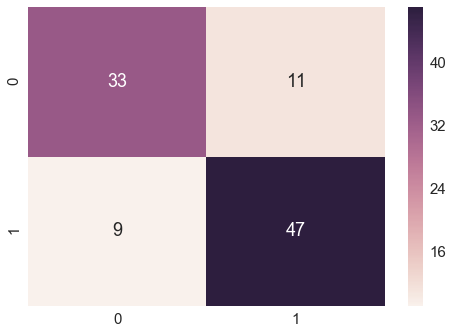

In [18]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
LR_pred = LR.predict(X_test)

analyze_model(LR, "Log Reg")

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(LR_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Log Loss: 
5.52628418293
Accuracy 0.84
F1 Score 0.857142857143
AUC Score 0.883825944171
Recall 0.827586206897
Precision 0.888888888889


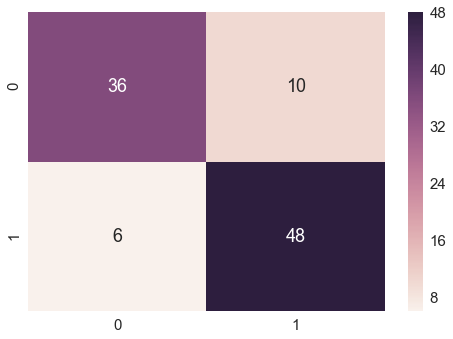

In [19]:
#('rf', rf_hyper), 
#('rf', clf), 
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('SVM', SVM_clf), ('log', LR), ('NB',NB_clf)], voting='soft')
ensemble.fit(X_train,y_train)

en_pred = ensemble.predict(X_test)

print ("Log Loss: ")
print log_loss(en_pred, y_test)

analyze_model(ensemble, "ensemble")

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm_hyp = confusion_matrix(en_pred, y_test)
sns.heatmap(cm_hyp, annot=True, fmt='g')
plt.show()

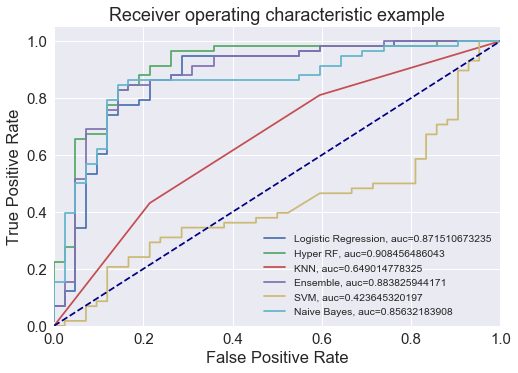

In [20]:
plot_auc(LR, "Logistic Regression")
plot_auc(rf_hyper, "Hyper RF")
plot_auc(KNN_clf, "KNN")
plot_auc(ensemble, "Ensemble")
plot_auc(SVM_clf, "SVM")
plot_auc(NB_clf, "Naive Bayes")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right", fontsize = 'xx-small')
plt.show()

In [21]:
score = pd.DataFrame.from_dict(models_data, orient='index')
score.columns = ['AUC Score', 'Accuracy', 'F1 Score', 'Recall', 'Precision']
score.sort_values(by=['AUC Score'], ascending=False)

,AUC Score,Accuracy,F1 Score,Recall,Precision
Random Forest,0.908456,0.84,0.859649,0.844828,0.875000
ensemble,0.883826,0.84,0.857143,0.827586,0.888889
Log Reg,0.871511,0.80,0.824561,0.810345,0.839286
Naive Bayes,0.856322,0.83,0.844037,0.793103,0.901961
KNN,0.649015,0.58,0.543478,0.431034,0.735294
SVM,0.423645,0.59,0.735484,0.982759,0.587629


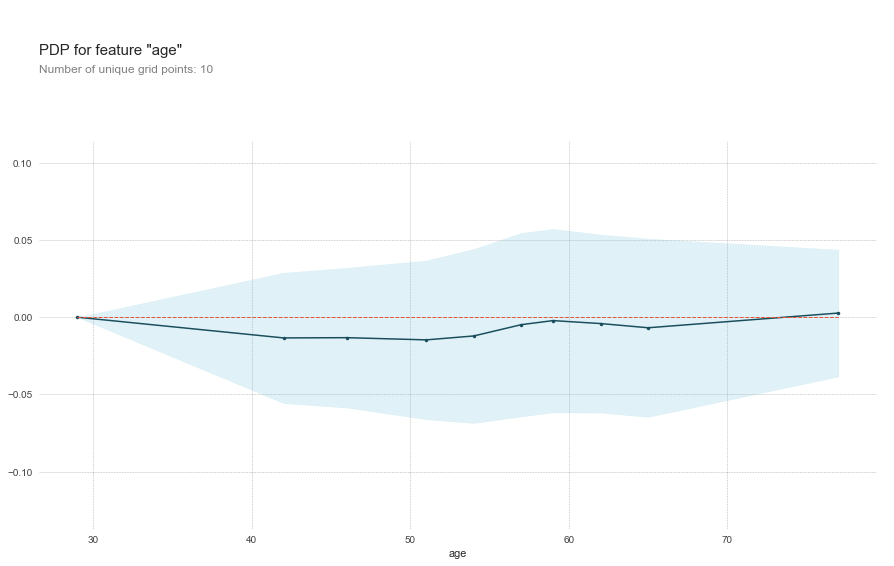

In [22]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feature_names = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create the data that we will plot
pdp_age = pdp.pdp_isolate(model=ensemble, dataset=data, model_features= feature_names , feature= 'age')

# plot it
pdp.pdp_plot(pdp_age, 'age')
plt.show()

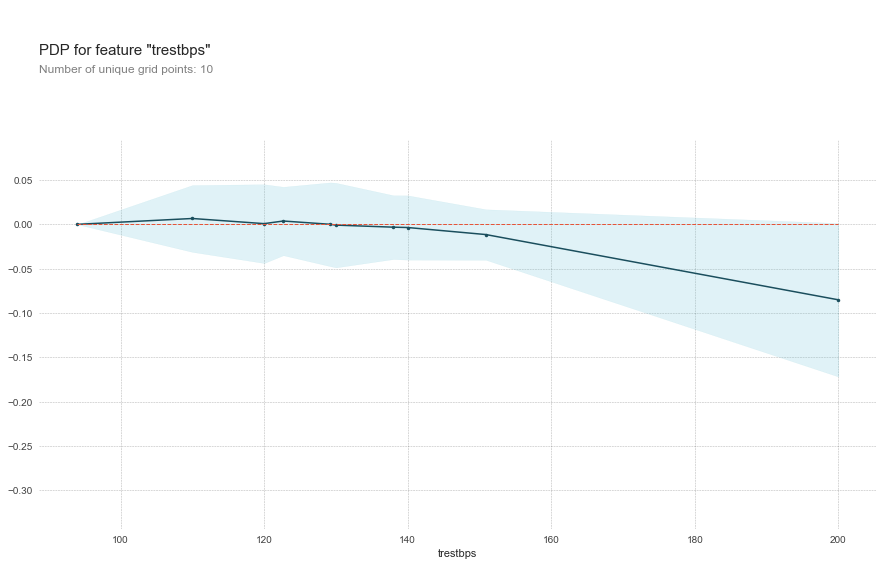

In [23]:
# Create the data that we will plot
pdp_age = pdp.pdp_isolate(model=ensemble, dataset=data, model_features= feature_names , feature= 'trestbps')

# plot it
pdp.pdp_plot(pdp_age, 'trestbps')
plt.show()

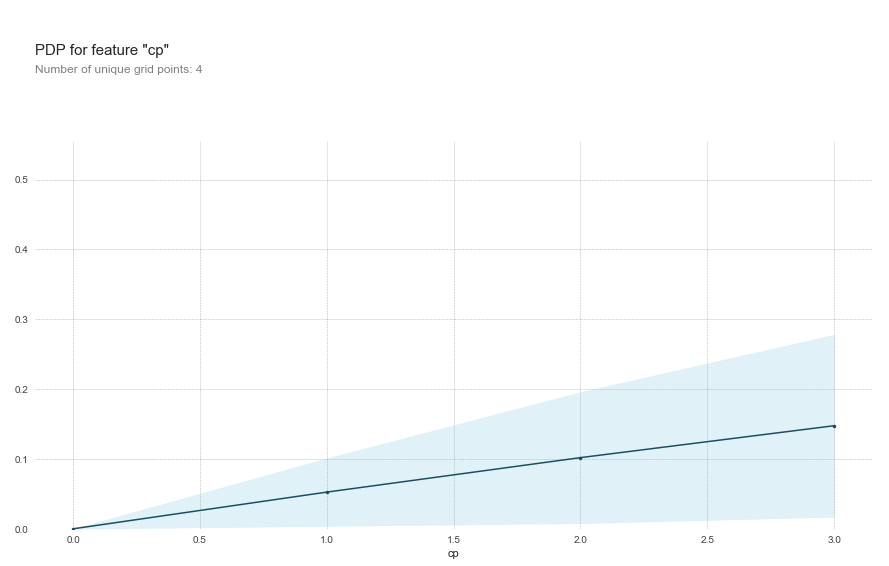

In [24]:
# Create the data that we will plot
pdp_age = pdp.pdp_isolate(model=ensemble, dataset=data, model_features= feature_names , feature= 'cp')

# plot it
pdp.pdp_plot(pdp_age, 'cp')
plt.show()